In [1]:
from fastbook import *

In [2]:
path = Path('data-v2')

In [3]:
fns = get_image_files(path)
fns

(#5021) [Path('data-v2/train/sell/2014-10-15.png'),Path('data-v2/train/sell/2014-01-29.png'),Path('data-v2/train/sell/2000-10-09.png'),Path('data-v2/train/sell/2003-09-26.png'),Path('data-v2/train/sell/2009-01-29.png'),Path('data-v2/train/sell/2012-03-06.png'),Path('data-v2/train/sell/2010-06-07.png'),Path('data-v2/train/sell/2000-02-25.png'),Path('data-v2/train/sell/2010-06-29.png'),Path('data-v2/train/sell/2005-02-09.png')...]

In [4]:
failed = verify_images(fns)
failed

(#0) []

In [5]:
graphs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(),
    get_y=parent_label,
    item_tfms=Resize(224, ResizeMethod.Squish))

In [6]:
dls = graphs.dataloaders(path)

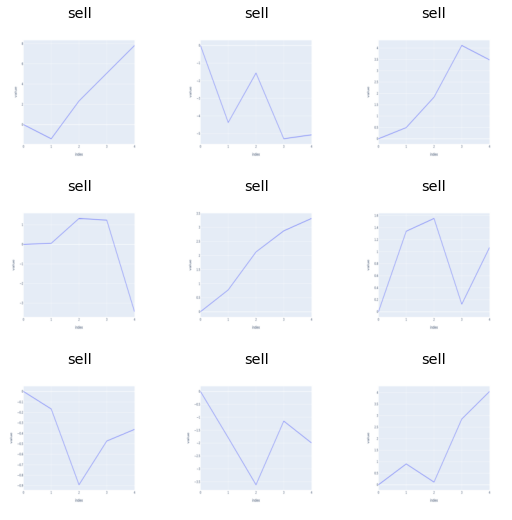

In [7]:
dls.valid.show_batch(max_n=9)

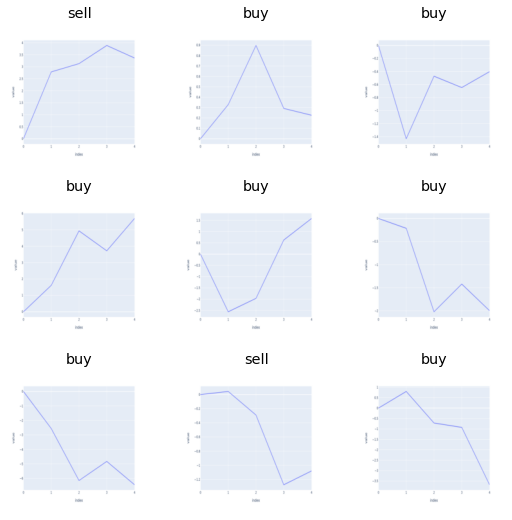

In [8]:
dls.train.show_batch(max_n=9)

In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.245488,0.937326,0.481518,00:24


epoch,train_loss,valid_loss,error_rate,time
0,1.010125,0.891566,0.500499,00:30
1,0.906897,0.766613,0.482517,00:30
2,0.823599,0.735272,0.505495,00:30
3,0.733085,0.745366,0.500499,00:31
4,0.658428,0.746112,0.500499,00:31


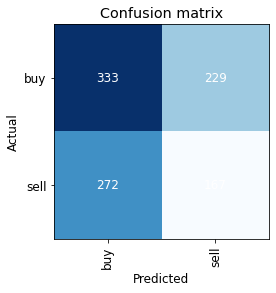

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

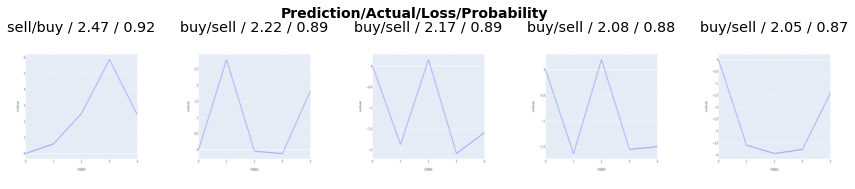

In [11]:
interp.plot_top_losses(5, nrows=1)